**Load the required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Pandas : Mengelola dan menganalisis data dalam bentuk tabel (data frame).**

**Numpy : Perhitungan numerik dan operasi pada array/matriks.**

**Seaborn : Visualisasi data yang menarik dan informatif.**

**Matplotlib.pyplot : Membuat grafik dasar seperti garis, batang, sebar, dll.**

**Load Dataset**

In [2]:
df = pd.read_csv('ObesityDataSet.csv')

df.head(): Menampilkan 5 baris pertama dari DataFrame.

df.tail(): Menampilkan 5 baris terakhir dari DataFrame.

In [3]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
df.tail()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
2106,20.976842,Female,1.71073,131.408528,Sometimes,yes,3,3,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3,3,no,no,2.00513,yes,1.34139,0.59927,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3,3,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.73945,133.346641,Sometimes,yes,3,3,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,23.664709,Female,1.738836,133.472641,Sometimes,yes,3,3,no,no,2.863513,yes,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


# **Exploratory Data Analysis**

**Identify the shape of dataset**

In [5]:
df.shape

(2111, 17)

**Get the list of columns**

In [6]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

**Get basic dataset information**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

* Dari output tersebut, bisa simpulkan
bahwa hampir semua kolom dalam dataset ini memiliki missing values, kecuali kolom NObeyesdad yang menjadi target label untuk klasifikasi obesitas.

* Seluruh kolom masih terbaca dengan tipe data object, termasuk kolom-kolom yang semestinya berisi angka seperti Age, Height, dan Weight. Ini menunjukkan bahwa kemungkinan ada format data yang belum konsisten atau data kotor yang menyebabkan angka tidak terbaca sebagai tipe numerik.

**Dataset visualization**

In [8]:
numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
for col in numerical_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [9]:
print(numerical_features)


['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


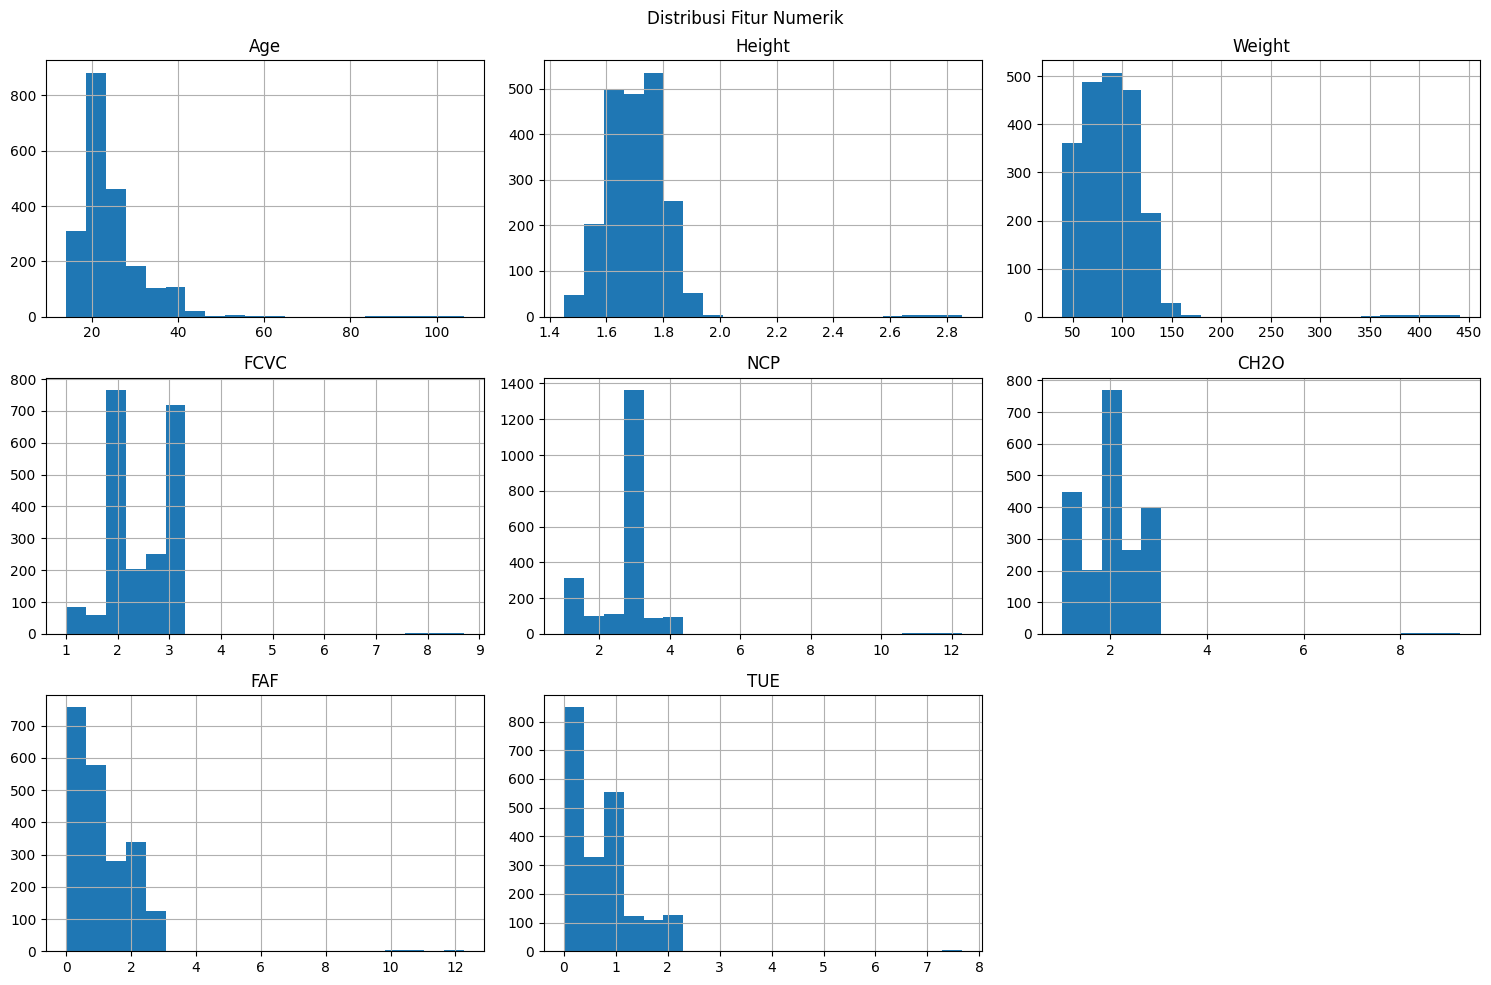

In [10]:
df[numerical_features].hist(figsize=(15, 10), bins=20)
plt.suptitle("Distribusi Fitur Numerik")
plt.tight_layout()
plt.show()

In [11]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2089.000000,2089.000000,2092.000000,2093.000000,2089.000000,2096.000000,2092.000000,2096.000000
mean,24.717928,1.706623,88.608184,2.443519,2.729418,2.030560,1.073435,0.680138
std,8.391323,0.117700,36.154617,0.642754,0.981124,0.737945,1.149364,0.717160
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.955257,1.630000,66.000000,2.000000,2.675411,1.569911,0.129009,0.000000
50%,22.814657,1.701284,83.000000,2.397284,3.000000,2.000000,1.000000,0.625360
75%,26.000000,1.770000,108.055736,3.000000,3.000000,2.482454,1.683612,1.000000
max,106.441252,2.853986,441.131078,8.706795,12.299828,9.233294,12.270275,7.669504


Dari hasil df.describe(), dapat dijelaskan ada outlier di kolom seperti Age, Height, dan Weight contohnya usia sampai 106 tahun dan berat 441 kg, yang tidak masuk akal. Kemudian, beberapa kolom seperti FAF dan TUE menunjukkan sebaran yang tidak merata, karena nilai maksimumnya jauh di atas nilai mediannya.Selain itu, jumlah data pada setiap kolom tidak sama, artinya masih ada missing values yang perlu dibersihkan.

**Visualisasi Distribusi Kolom Nobeyesdad**

<ipython-input-12-1267156522>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="NObeyesdad", palette="Set2", edgecolor='black', order=df["NObeyesdad"].value_counts().index)


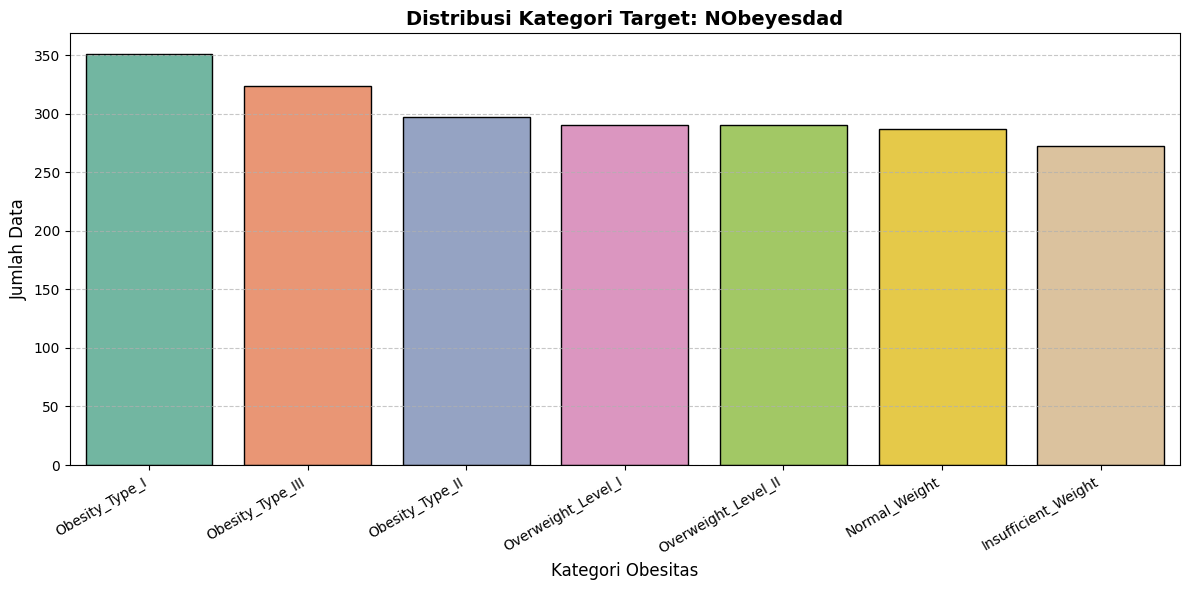

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="NObeyesdad", palette="Set2", edgecolor='black', order=df["NObeyesdad"].value_counts().index)
plt.xlabel("Kategori Obesitas", fontsize=12)
plt.ylabel("Jumlah Data", fontsize=12)
plt.title("Distribusi Kategori Target: NObeyesdad", fontsize=14, fontweight='bold')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Distribusi data pada setiap kategori obesitas cukup seimbang. Kategori Obesity_Type_I merupakan yang paling dominan, sementara Insufficient_Weight paling sedikit. Secara umum, mayoritas data menunjukkan kecenderungan ke arah kelebihan berat badan hingga obesitas.

**unique value**

In [13]:
for col in df.columns:
    print(f"Kolom: {col} - Jumlah Nilai Unik: {df[col].nunique()}")
    print(f"Nilai unik: {df[col].unique()}")
    print("-" * 40)

Kolom: Age - Jumlah Nilai Unik: 1393
Nilai unik: [21.       23.       27.       ... 22.524036 24.361936 23.664709]
----------------------------------------
Kolom: Gender - Jumlah Nilai Unik: 3
Nilai unik: ['Female' 'Male' '?' nan]
----------------------------------------
Kolom: Height - Jumlah Nilai Unik: 1561
Nilai unik: [1.62     1.52     1.8      ... 1.752206 1.73945  1.738836]
----------------------------------------
Kolom: Weight - Jumlah Nilai Unik: 1517
Nilai unik: [ 64.        56.        77.       ... 133.689352 133.346641 133.472641]
----------------------------------------
Kolom: CALC - Jumlah Nilai Unik: 5
Nilai unik: ['no' 'Sometimes' 'Frequently' '?' 'Always' nan]
----------------------------------------
Kolom: FAVC - Jumlah Nilai Unik: 3
Nilai unik: ['no' 'yes' '?' nan]
----------------------------------------
Kolom: FCVC - Jumlah Nilai Unik: 807
Nilai unik: [2.         3.         1.                nan 8.14899274 8.42397393
 2.450218   2.880161   2.00876    2.596579   2.5

Dataset mengandung nilai tidak valid seperti '?', nilai numerik yang tidak realistis, dan ketidakkonsistenan kategori, sehingga perlu pembersihan.

**Identify missing values**

In [14]:
df.isnull().sum()

,0
Age,22
Gender,9
Height,22
Weight,19
CALC,5
FAVC,11
FCVC,18
NCP,22
SCC,10
SMOKE,5


In [15]:
(df.isnull().sum()/(len(df)))*100

,0
Age,1.042160
Gender,0.426338
Height,1.042160
Weight,0.900047
CALC,0.236855
FAVC,0.521080
FCVC,0.852676
NCP,1.042160
SCC,0.473709
SMOKE,0.236855


**Identify duplicate entries/ rows**

In [16]:
df.shape

(2111, 17)

In [17]:
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah baris duplikat: {jumlah_duplikat}")

Jumlah baris duplikat: 18


In [18]:
df[df.duplicated()]

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
98,21.0,Female,1.52,42.0,Sometimes,no,3.0,1.0,no,no,1.0,no,0.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
174,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
179,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
184,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
309,16.0,Female,1.66,58.0,no,no,2.0,1.0,no,no,1.0,no,0.0,1.0,Sometimes,Walking,Normal_Weight
460,18.0,Female,1.62,55.0,no,yes,2.0,3.0,no,no,1.0,yes,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
663,21.0,Female,1.52,42.0,Sometimes,yes,3.0,1.0,no,no,1.0,no,0.0,0.0,Frequently,Public_Transportation,Insufficient_Weight
763,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
764,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I
824,21.0,Male,1.62,70.0,Sometimes,yes,2.0,1.0,no,no,3.0,no,1.0,0.0,no,Public_Transportation,Overweight_Level_I


**Target class balance**

In [19]:
print(df["NObeyesdad"].value_counts())

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64


Berdasarkan output distribusi kelas target NObeyesdad, terlihat bahwa data cukup seimbang antar kelas, meskipun terdapat sedikit perbedaan jumlah. Kelas dengan jumlah terbanyak adalah Obesity_Type_I (351 data), sedangkan yang paling sedikit adalah Insufficient_Weight (272 data).

**Outlier**

<ipython-input-20-1106957391>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='Set2')
<ipython-input-20-1106957391>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='Set2')
<ipython-input-20-1106957391>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], palette='Set2')
<ipython-input-20-1106957391>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot

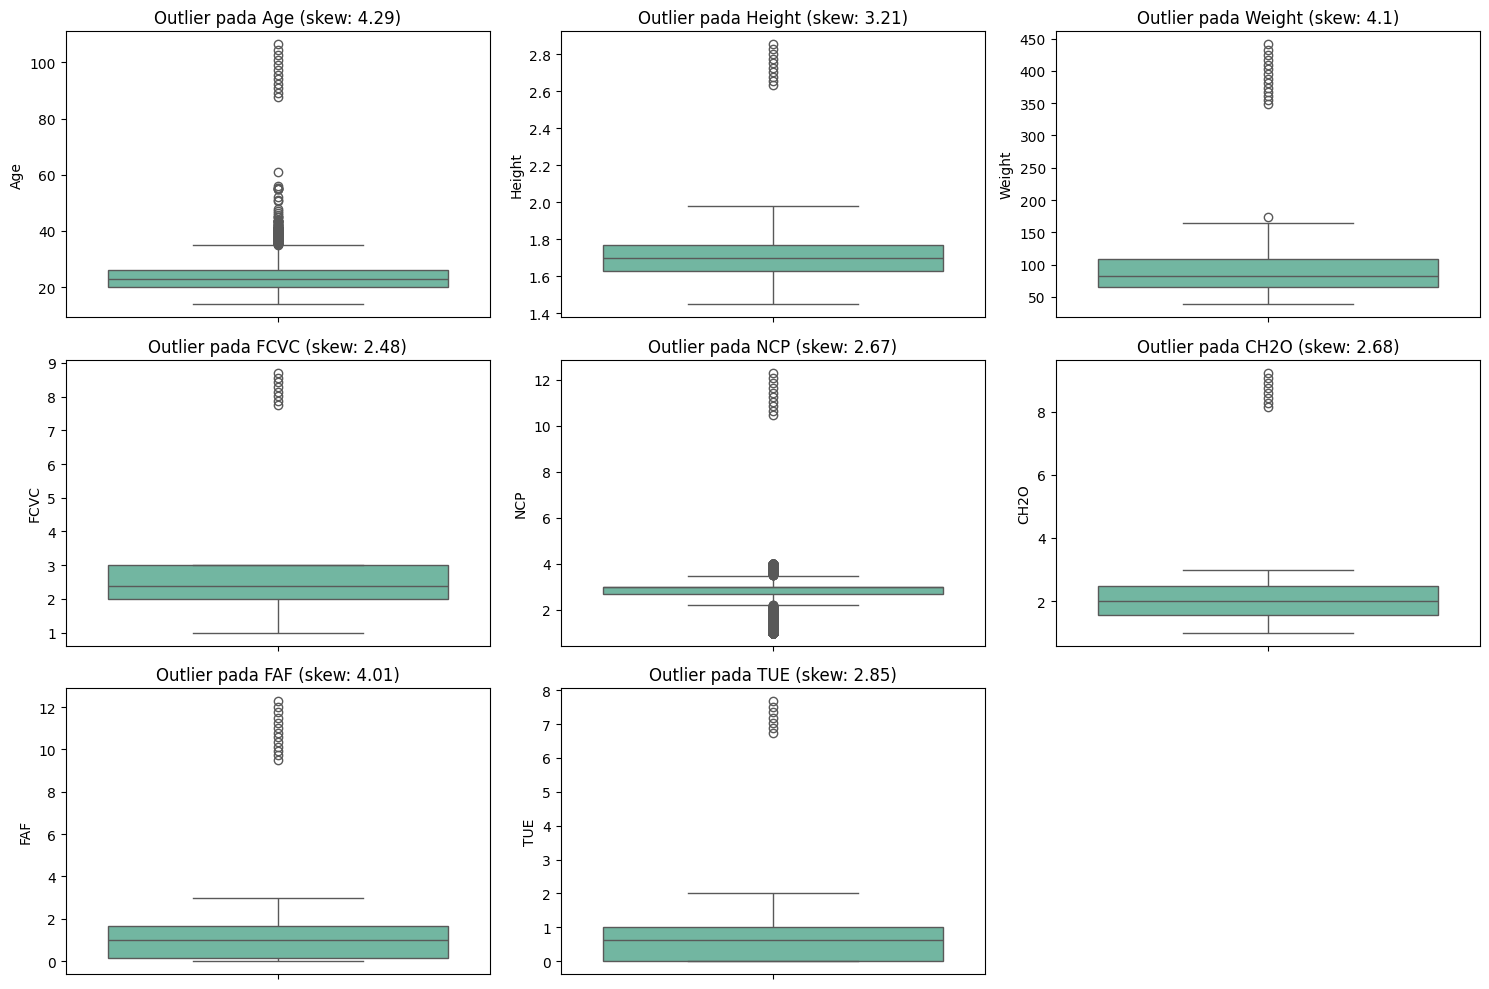

In [20]:
plt.figure(figsize=(15, 10))

max_plots = min(len(numerical_features), 9)  # Maksimal 9 subplot (3x3)
for i, col in enumerate(numerical_features[:max_plots], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], palette='Set2')
    skewness = round(df[col].skew(skipna=True), 2)
    plt.title(f'Outlier pada {col} (skew: {skewness})')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# **Preprocessing**

**Remove missing values**

Menghapus semua baris dalam DataFrame df yang mengandung nilai kosong (NaN/null)

In [21]:
df_bersih = df.dropna()

In [22]:
df_bersih.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1889 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1889 non-null   float64
 1   Gender                          1889 non-null   object 
 2   Height                          1889 non-null   float64
 3   Weight                          1889 non-null   float64
 4   CALC                            1889 non-null   object 
 5   FAVC                            1889 non-null   object 
 6   FCVC                            1889 non-null   float64
 7   NCP                             1889 non-null   float64
 8   SCC                             1889 non-null   object 
 9   SMOKE                           1889 non-null   object 
 10  CH2O                            1889 non-null   float64
 11  family_history_with_overweight  1889 non-null   object 
 12  FAF                             1889 no

**Delete duplicate data**

In [23]:
df_bersih = df_bersih.drop_duplicates()

In [24]:
df_bersih.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1871 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1871 non-null   float64
 1   Gender                          1871 non-null   object 
 2   Height                          1871 non-null   float64
 3   Weight                          1871 non-null   float64
 4   CALC                            1871 non-null   object 
 5   FAVC                            1871 non-null   object 
 6   FCVC                            1871 non-null   float64
 7   NCP                             1871 non-null   float64
 8   SCC                             1871 non-null   object 
 9   SMOKE                           1871 non-null   object 
 10  CH2O                            1871 non-null   float64
 11  family_history_with_overweight  1871 non-null   object 
 12  FAF                             1871 no

**Check unique values**

Pada Proses sebelumnya telah teridentifikasi ada '?' dalam dataset, untuk itu dilakukan pengecheckan ulang masing - masing kolom yang dicurigai.

In [25]:
kolom_unik = ["Gender", "CALC", "FAVC", "SCC", "SMOKE", "family_history_with_overweight", "CAEC", "MTRANS", "NObeyesdad"]

for col in kolom_unik:
    print(f"Kolom: {col} - Jumlah Nilai Unik: {df_bersih[col].nunique()}")
    print(f"Nilai unik: {df_bersih[col].unique()}")
    print("-" * 40)

Kolom: Gender - Jumlah Nilai Unik: 3
Nilai unik: ['Female' 'Male' '?']
----------------------------------------
Kolom: CALC - Jumlah Nilai Unik: 5
Nilai unik: ['no' 'Sometimes' 'Frequently' '?' 'Always']
----------------------------------------
Kolom: FAVC - Jumlah Nilai Unik: 3
Nilai unik: ['no' 'yes' '?']
----------------------------------------
Kolom: SCC - Jumlah Nilai Unik: 3
Nilai unik: ['no' 'yes' '?']
----------------------------------------
Kolom: SMOKE - Jumlah Nilai Unik: 3
Nilai unik: ['no' 'yes' '?']
----------------------------------------
Kolom: family_history_with_overweight - Jumlah Nilai Unik: 3
Nilai unik: ['yes' 'no' '?']
----------------------------------------
Kolom: CAEC - Jumlah Nilai Unik: 5
Nilai unik: ['Sometimes' 'Frequently' 'Always' 'no' '?']
----------------------------------------
Kolom: MTRANS - Jumlah Nilai Unik: 6
Nilai unik: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike' '?']
----------------------------------------
Kolom: NObeyes

In [26]:
# Bersihkan spasi di awal/akhir untuk semua kolom bertipe objek (string)
for kolom in df_bersih.select_dtypes(include='object').columns:
    df_bersih[kolom] = df_bersih[kolom].str.strip()

# Ganti semua tanda tanya dengan nilai NaN
df_bersih.replace(to_replace="?", value=np.nan, inplace=True)

# Imputasi nilai hilang dengan nilai paling sering (modus) untuk kolom kategorikal
kolom_objek = df_bersih.select_dtypes(include='object').columns
for kol in kolom_objek:
    if df_bersih[kol].isnull().any():
        nilai_terbanyak = df_bersih[kol].mode(dropna=True)[0]
        df_bersih[kol] = df_bersih[kol].fillna(nilai_terbanyak)

# Cek apakah masih ada nilai NaN setelah proses imputasi
jumlah_nan = df_bersih.isna().sum()
print("Sisa nilai yang hilang per kolom:\n", jumlah_nan)


Sisa nilai yang hilang per kolom:
 Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


<ipython-input-26-3920408189>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bersih[kolom] = df_bersih[kolom].str.strip()
<ipython-input-26-3920408189>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bersih.replace(to_replace="?", value=np.nan, inplace=True)
<ipython-input-26-3920408189>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

**Handle outlier**

In [27]:
df_bersih.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1871.000000,1871.000000,1871.000000,1871.000000,1871.000000,1871.000000,1871.000000,1871.000000
mean,24.770383,1.708407,89.017473,2.447022,2.753488,2.030647,1.082590,0.684811
std,8.624885,0.120062,37.246267,0.652882,0.990781,0.746956,1.181643,0.730294
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.952931,1.630000,65.328560,2.000000,2.734392,1.584812,0.119641,0.000000
50%,22.804818,1.704193,83.016968,2.397280,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.770468,108.224463,3.000000,3.000000,2.473548,1.697675,1.000000
max,106.441252,2.853986,441.131078,8.706795,12.299828,9.233294,12.270275,7.669504


In [28]:
for col in numerical_features:
    Q1 = df_bersih[col].quantile(0.25)
    Q3 = df_bersih[col].quantile(0.75)
    IQR = Q3 - Q1
    df_bersih = df_bersih[(df_bersih[col] >= Q1 - 1.5*IQR) & (df_bersih[col] <= Q3 + 1.5*IQR)]


In [29]:
df_bersih.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000,1170.000000
mean,23.144453,1.715131,92.504880,2.456863,2.976889,2.060705,1.031469,0.693352
std,4.102400,0.087400,27.473986,0.546924,0.115006,0.601654,0.855703,0.586877
min,14.000000,1.450000,39.000000,1.000000,2.390070,1.000000,0.000000,0.000000
25%,20.000000,1.649546,70.110694,2.000000,3.000000,1.734719,0.143955,0.105905
50%,22.760437,1.717688,91.132174,2.557486,3.000000,2.000000,1.000000,0.681950
75%,25.982224,1.774931,113.047888,3.000000,3.000000,2.553805,1.630179,1.000000
max,35.000000,1.980000,173.000000,3.000000,3.362758,3.000000,3.000000,2.000000


Setelah membersihkan data dari nilai outlier menggunakan metode IQR (Interquartile Range), dataset kini berisi 1.170 baris, dengan distribusi nilai numerik yang lebih masuk akal dan tidak ekstrem, contohnya nilai maksimum umur yang awalnya 106 tahun kini hanya 35 tahun.

**Encoding**

In [30]:
kolom_unik = ["Gender", "CALC", "FAVC", "SCC", "SMOKE", "family_history_with_overweight", "CAEC", "MTRANS", "NObeyesdad"]

for col in kolom_unik:
    print(f"Kolom: {col} - Jumlah Nilai Unik: {df_bersih[col].nunique()}")
    print(f"Nilai unik: {df_bersih[col].unique()}")
    print("-" * 40)

Kolom: Gender - Jumlah Nilai Unik: 2
Nilai unik: ['Female' 'Male']
----------------------------------------
Kolom: CALC - Jumlah Nilai Unik: 3
Nilai unik: ['no' 'Sometimes' 'Frequently']
----------------------------------------
Kolom: FAVC - Jumlah Nilai Unik: 2
Nilai unik: ['no' 'yes']
----------------------------------------
Kolom: SCC - Jumlah Nilai Unik: 2
Nilai unik: ['no' 'yes']
----------------------------------------
Kolom: SMOKE - Jumlah Nilai Unik: 2
Nilai unik: ['no' 'yes']
----------------------------------------
Kolom: family_history_with_overweight - Jumlah Nilai Unik: 2
Nilai unik: ['yes' 'no']
----------------------------------------
Kolom: CAEC - Jumlah Nilai Unik: 4
Nilai unik: ['Sometimes' 'Frequently' 'Always' 'no']
----------------------------------------
Kolom: MTRANS - Jumlah Nilai Unik: 5
Nilai unik: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
----------------------------------------
Kolom: NObeyesdad - Jumlah Nilai Unik: 7
Nilai unik: ['

In [31]:
# Mapping untuk tiap kolom kategorikal
mapping_gender = {'Female': 0, 'Male': 1}
mapping_calc = {'no': 0, 'Sometimes': 1, 'Frequently': 2}
mapping_favc = {'no': 0, 'yes': 1}
mapping_scc = {'no': 0, 'yes': 1}
mapping_smoke = {'no': 0, 'yes': 1}
mapping_family_history = {'no': 0, 'yes': 1}
mapping_caec = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
mapping_mtrans = {
    'Public_Transportation': 0,
    'Walking': 1,
    'Automobile': 2,
    'Motorbike': 3,
    'Bike': 4
}
mapping_nobeyesdad = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

# Terapkan mapping ke df_bersih
df_bersih['Gender'] = df_bersih['Gender'].map(mapping_gender)
df_bersih['CALC'] = df_bersih['CALC'].map(mapping_calc)
df_bersih['FAVC'] = df_bersih['FAVC'].map(mapping_favc)
df_bersih['SCC'] = df_bersih['SCC'].map(mapping_scc)
df_bersih['SMOKE'] = df_bersih['SMOKE'].map(mapping_smoke)
df_bersih['family_history_with_overweight'] = df_bersih['family_history_with_overweight'].map(mapping_family_history)
df_bersih['CAEC'] = df_bersih['CAEC'].map(mapping_caec)
df_bersih['MTRANS'] = df_bersih['MTRANS'].map(mapping_mtrans)
df_bersih['NObeyesdad'] = df_bersih['NObeyesdad'].map(mapping_nobeyesdad)


In [32]:
df_bersih.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,0,1.62,64.0,0,0,2.0,3.0,0,0,2.0,1,0.0,1.0,1,0,1
1,21.0,0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,1
2,23.0,1,1.80,77.0,2,0,2.0,3.0,0,0,2.0,1,2.0,1.0,1,0,1
3,27.0,1,1.80,87.0,2,0,3.0,3.0,0,0,2.0,0,2.0,0.0,1,1,2
5,29.0,1,1.62,53.0,1,1,2.0,3.0,0,0,2.0,0,0.0,0.0,1,2,1


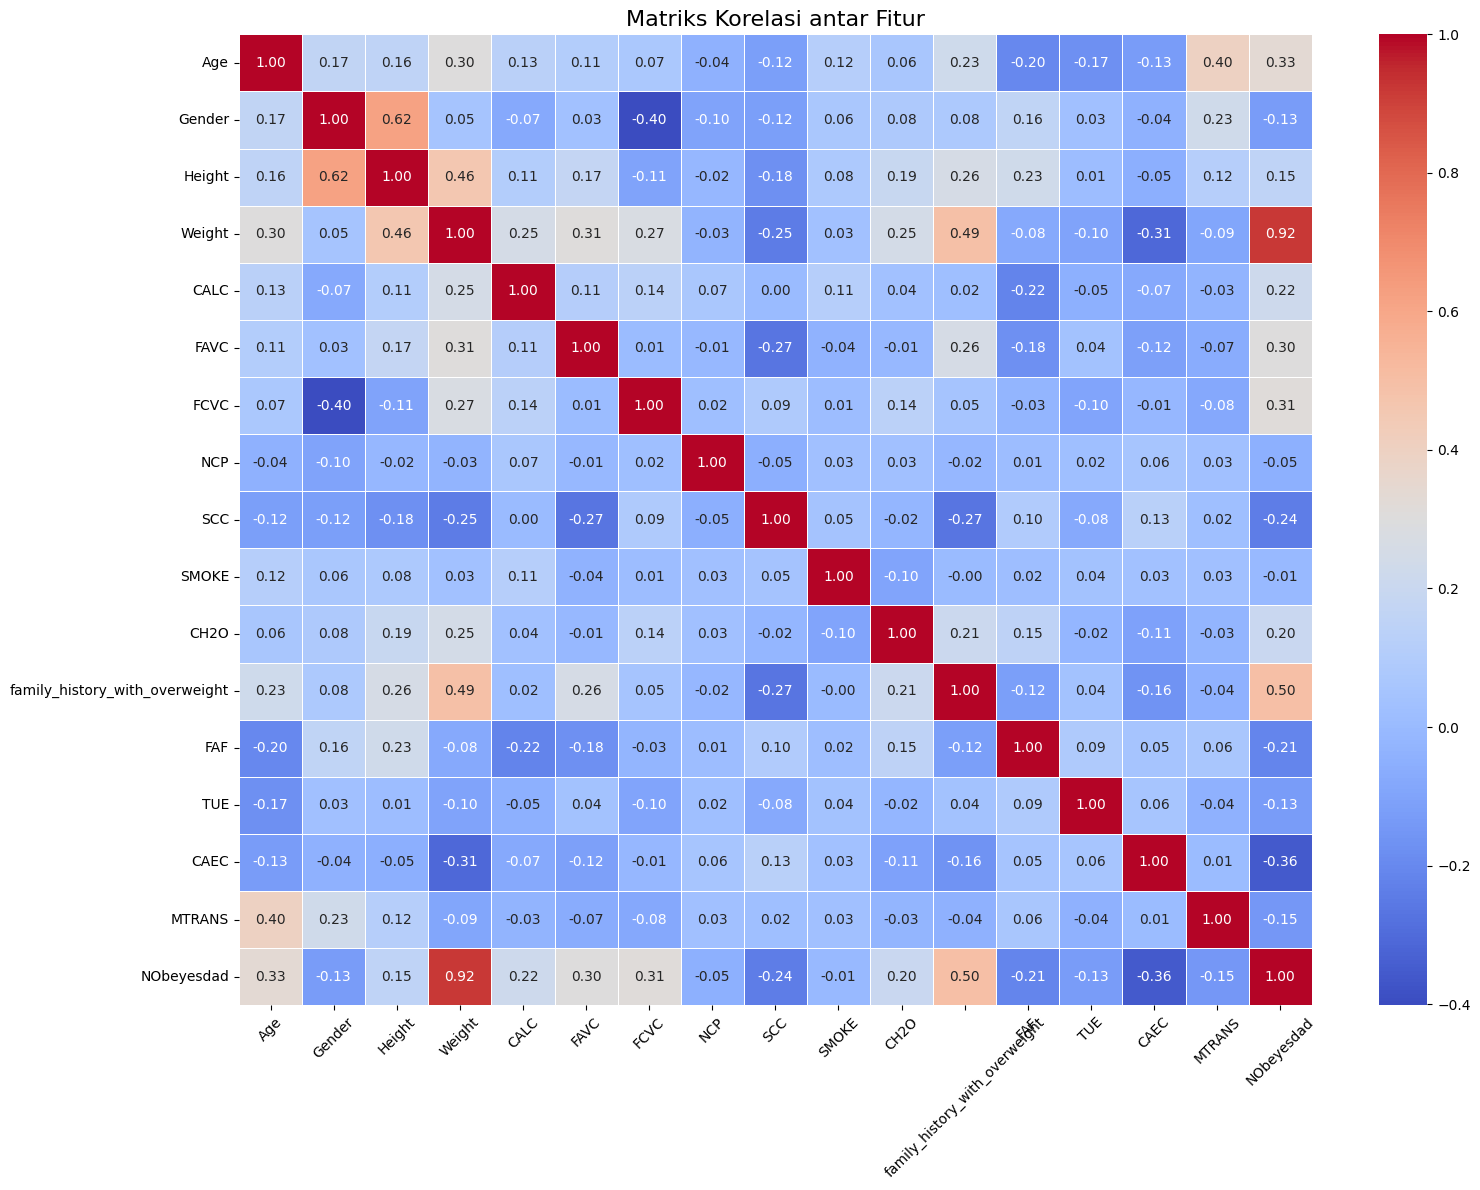

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung korelasi antar semua kolom numerik
corr_matrix = df_bersih.corr(numeric_only=True)

# Tampilkan heatmap korelasi
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriks Korelasi antar Fitur", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [34]:
df_bersih.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1170 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1170 non-null   float64
 1   Gender                          1170 non-null   int64  
 2   Height                          1170 non-null   float64
 3   Weight                          1170 non-null   float64
 4   CALC                            1170 non-null   int64  
 5   FAVC                            1170 non-null   int64  
 6   FCVC                            1170 non-null   float64
 7   NCP                             1170 non-null   float64
 8   SCC                             1170 non-null   int64  
 9   SMOKE                           1170 non-null   int64  
 10  CH2O                            1170 non-null   float64
 11  family_history_with_overweight  1170 non-null   int64  
 12  FAF                             1170 no

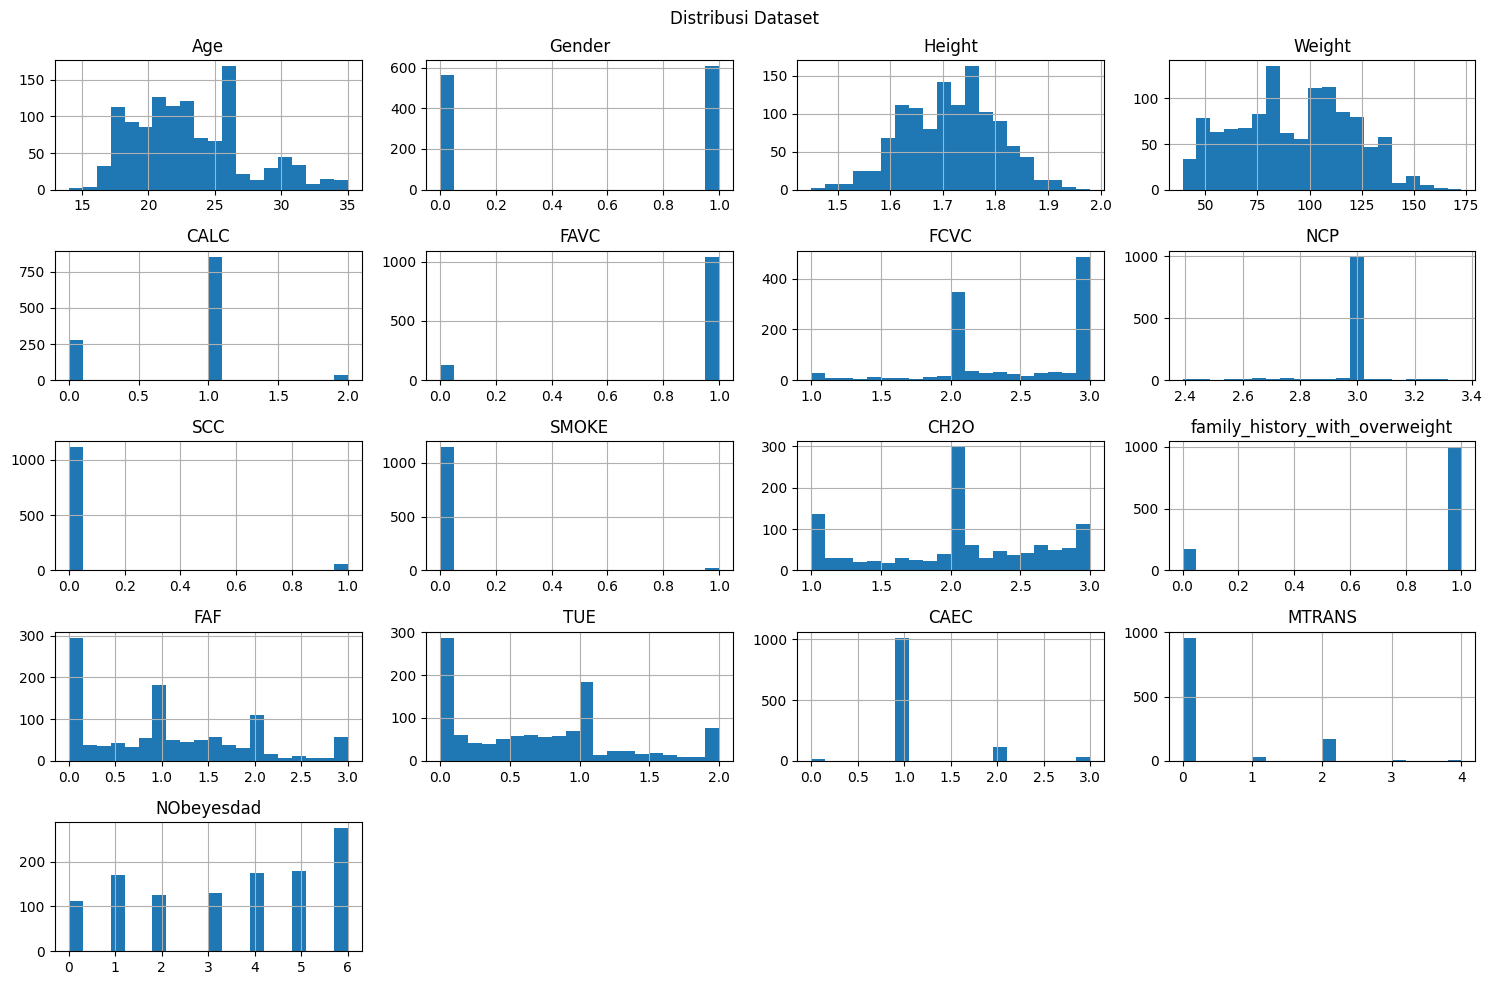

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram
df_bersih.hist(figsize=(15, 10), bins=20)
plt.suptitle("Distribusi Dataset")
plt.tight_layout()
plt.show()

**Normalisasi**

In [36]:
from sklearn.preprocessing import MinMaxScaler

# Daftar kolom numerik
fitur_numerik = ['Age', 'Height', 'Weight', 'FCVC', 'CH2O', 'FAF', 'TUE']

# Inisialisasi objek MinMaxScaler
minmax = MinMaxScaler()

# Salin dataframe
data_scaled = df_bersih.copy()

# Lakukan normalisasi untuk setiap kolom numerik
for kolom in fitur_numerik:
    data_scaled[kolom] = minmax.fit_transform(data_scaled[[kolom]])

# Tampilkan hasil
data_scaled.head(10)


,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,0.333333,0,0.320755,0.186567,0,0,0.5,3.0,0,0,0.5,1,0.000000,0.5,1,0,1
1,0.333333,0,0.132075,0.126866,1,0,1.0,3.0,1,1,1.0,1,1.000000,0.0,1,0,1
2,0.428571,1,0.660377,0.283582,2,0,0.5,3.0,0,0,0.5,1,0.666667,0.5,1,0,1
3,0.619048,1,0.660377,0.358209,2,0,1.0,3.0,0,0,0.5,0,0.666667,0.0,1,1,2
5,0.714286,1,0.320755,0.104478,1,1,0.5,3.0,0,0,0.5,0,0.000000,0.0,1,2,1
6,0.428571,0,0.094340,0.119403,1,1,1.0,3.0,0,0,0.5,1,0.333333,0.0,1,3,1
7,0.380952,1,0.358491,0.104478,1,0,0.5,3.0,0,0,0.5,0,1.000000,0.0,1,0,1
9,0.380952,1,0.509434,0.216418,0,1,0.5,3.0,0,0,0.5,1,0.333333,0.5,1,0,1
10,0.571429,1,0.754717,0.492537,1,1,1.0,3.0,0,0,1.0,1,0.666667,1.0,2,0,4
11,0.333333,0,0.509434,0.305970,1,1,0.5,3.0,1,0,0.5,1,0.666667,0.5,2,0,3


Proses ini memastikan semua fitur numerik seperti Age, Weight, Height, dll., memiliki skala yang seragam antara 0 dan 1, sehingga dapat meningkatkan kinerja model machine learning yang sensitif terhadap perbedaan skala.

# **Modelling**

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

**Pemisahan Data (data splitting)**

In [38]:
# Tentukan kolom target
target_column = 'NObeyesdad'

# Pisahkan fitur dan target
X = df_bersih.drop(columns=target_column)
y = df_bersih[target_column]

In [39]:
# Bagi dataset: 80% training, 20% testing
X_latih, X_uji, y_latih, y_uji = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [40]:

from imblearn.over_sampling import SMOTE
# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Terapkan SMOTE pada data latih
X_smote, y_smote = smote.fit_resample(X_latih, y_latih)

# Cek distribusi kelas setelah SMOTE
print("Distribusi kelas setelah SMOTE:")
print(y_smote.value_counts())

Distribusi kelas setelah SMOTE:
NObeyesdad
4    220
5    220
3    220
2    220
0    220
6    220
1    220
Name: count, dtype: int64


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import pandas as pd

# Inisialisasi model
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'Support Vector Machine': SVC()
}




**Training & Evaluasi Model**

Model: Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.96      0.85        23
           1       0.88      0.65      0.75        34
           2       0.67      0.72      0.69        25
           3       0.81      0.85      0.83        26
           4       0.91      0.89      0.90        35
           5       0.94      0.94      0.94        36
           6       0.98      1.00      0.99        55

    accuracy                           0.87       234
   macro avg       0.85      0.86      0.85       234
weighted avg       0.88      0.87      0.87       234

Model: Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        23
           1       0.91      0.85      0.88        34
           2       0.88      0.84      0.86        25
           3       0.87      1.00      0.93        26
           4       0.94      0.94      0.94        35
           

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:58:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        23
           1       0.88      0.88      0.88        34
           2       0.92      0.92      0.92        25
           3       0.96      0.92      0.94        26
           4       0.95      1.00      0.97        35
           5       1.00      0.94      0.97        36
           6       1.00      1.00      1.00        55

    accuracy                           0.95       234
   macro avg       0.94      0.94      0.94       234
weighted avg       0.95      0.95      0.95       234

Model: Support Vector Machine
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.96      0.75        23
           1       0.56      0.29      0.38        34
           2       0.52      0.48      0.50        25
           3       0.44      0.69      0.54        26
           4       0.83      0.54      0.66        35
  

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.96      0.85        23
           1       0.88      0.65      0.75        34
           2       0.67      0.72      0.69        25
           3       0.81      0.85      0.83        26
           4       0.91      0.89      0.90        35
           5       0.94      0.94      0.94        36
           6       0.98      1.00      0.99        55

    accuracy                           0.87       234
   macro avg       0.85      0.86      0.85       234
weighted avg       0.88      0.87      0.87       234

Confusion Matrix:
[[22  1  0  0  0  0  0]
 [ 6 22  5  1  0  0  0]
 [ 1  1 18  4  1  0  0]
 [ 0  1  2 22  0  1  0]
 [ 0  0  2  0 31  1  1]
 [ 0  0  0  0  2 34  0]
 [ 0  0  0  0  0  0 55]]


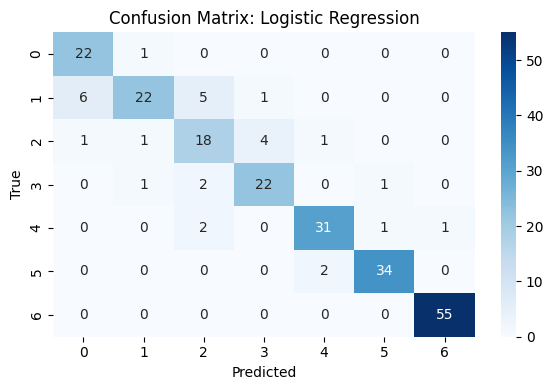

Model: Decision Tree
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        23
           1       0.97      0.88      0.92        34
           2       0.92      0.92      0.92        25
           3       0.87      1.00      0.93        26
           4       0.97      0.94      0.96        35
           5       1.00      0.97      0.99        36
           6       1.00      1.00      1.00        55

    accuracy                           0.96       234
   macro avg       0.95      0.95      0.95       234
weighted avg       0.96      0.96      0.96       234

Confusion Matrix:
[[22  1  0  0  0  0  0]
 [ 2 30  2  0  0  0  0]
 [ 0  0 23  2  0  0  0]
 [ 0  0  0 26  0  0  0]
 [ 0  0  0  2 33  0  0]
 [ 0  0  0  0  1 35  0]
 [ 0  0  0  0  0  0 55]]


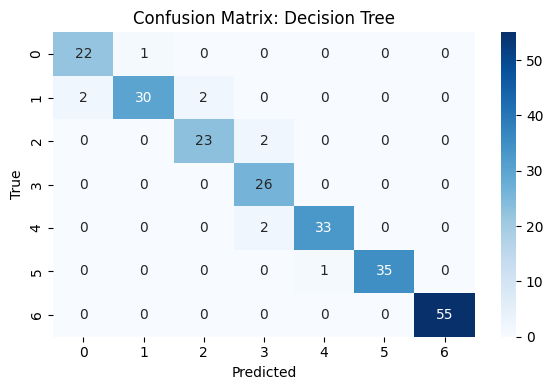

Model: K-Nearest Neighbors
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.91      0.82        23
           1       0.82      0.53      0.64        34
           2       0.69      0.96      0.80        25
           3       0.91      0.77      0.83        26
           4       0.89      0.94      0.92        35
           5       1.00      0.92      0.96        36
           6       0.96      1.00      0.98        55

    accuracy                           0.87       234
   macro avg       0.86      0.86      0.85       234
weighted avg       0.88      0.87      0.87       234

Confusion Matrix:
[[21  2  0  0  0  0  0]
 [ 6 18  9  1  0  0  0]
 [ 1  0 24  0  0  0  0]
 [ 0  2  2 20  2  0  0]
 [ 0  0  0  1 33  0  1]
 [ 0  0  0  0  2 33  1]
 [ 0  0  0  0  0  0 55]]


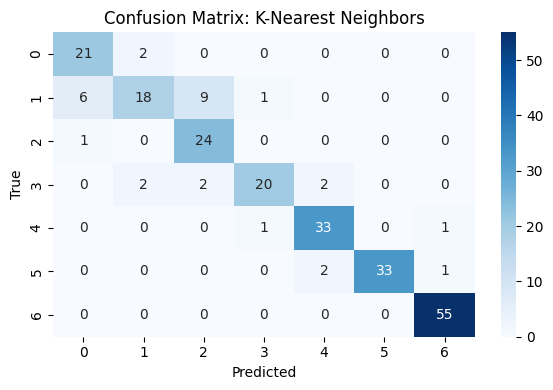

Model: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:58:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        23
           1       0.88      0.88      0.88        34
           2       0.92      0.92      0.92        25
           3       0.96      0.92      0.94        26
           4       0.95      1.00      0.97        35
           5       1.00      0.94      0.97        36
           6       1.00      1.00      1.00        55

    accuracy                           0.95       234
   macro avg       0.94      0.94      0.94       234
weighted avg       0.95      0.95      0.95       234

Confusion Matrix:
[[21  2  0  0  0  0  0]
 [ 3 30  1  0  0  0  0]
 [ 0  1 23  1  0  0  0]
 [ 0  1  1 24  0  0  0]
 [ 0  0  0  0 35  0  0]
 [ 0  0  0  0  2 34  0]
 [ 0  0  0  0  0  0 55]]


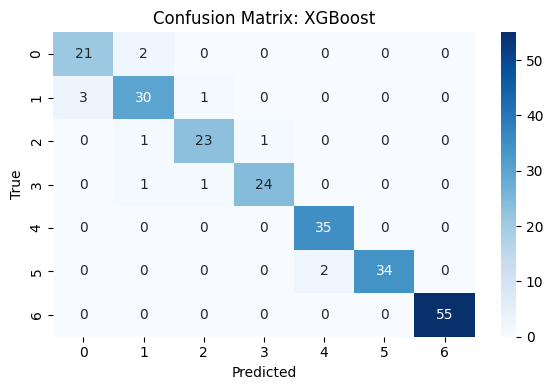

Model: Support Vector Machine
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.96      0.75        23
           1       0.56      0.29      0.38        34
           2       0.52      0.48      0.50        25
           3       0.44      0.69      0.54        26
           4       0.83      0.54      0.66        35
           5       0.67      0.78      0.72        36
           6       0.80      0.75      0.77        55

    accuracy                           0.64       234
   macro avg       0.63      0.64      0.62       234
weighted avg       0.66      0.64      0.63       234

Confusion Matrix:
[[22  1  0  0  0  0  0]
 [13 10  8  3  0  0  0]
 [ 1  4 12  8  0  0  0]
 [ 0  3  3 18  2  0  0]
 [ 0  0  0 12 19  0  4]
 [ 0  0  0  0  2 28  6]
 [ 0  0  0  0  0 14 41]]


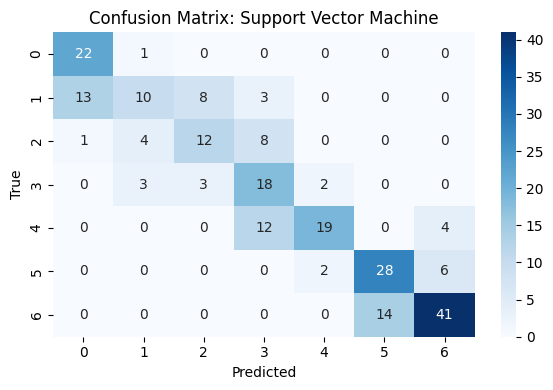

In [46]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Inisialisasi dictionary untuk menyimpan hasil evaluasi ringkasan
hasil_ringkasan = {}

# Loop untuk setiap model
for nama, model in models.items():
    print("="*60)
    print(f"Model: {nama}")

    # Latih model dengan data yang telah di-SMOTE
    model.fit(X_smote, y_smote)

    # Prediksi dengan data uji
    y_pred = model.predict(X_uji)

    # Classification report
    report = classification_report(y_uji, y_pred, output_dict=True, zero_division=0)
    print("Classification Report:")
    print(classification_report(y_uji, y_pred, zero_division=0))

    # Simpan ringkasan metrik
    # Inisialisasi dictionary untuk menyimpan hasil evaluasi ringkasan
hasil_ringkasan = {}

# Loop untuk setiap model
for nama, model in models.items():
    print("="*60)
    print(f"Model: {nama}")

    model.fit(X_smote, y_smote)
    y_pred = model.predict(X_uji)

    # Classification report
    report = classification_report(y_uji, y_pred, output_dict=True, zero_division=0)
    print("Classification Report:")
    print(classification_report(y_uji, y_pred, zero_division=0))

    # Simpan hasil ke dictionary dengan key nama model
    hasil_ringkasan[nama] = {
        'Accuracy': report['accuracy'],
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1 Score': report['weighted avg']['f1-score']
    }

    # Confusion matrix
    cm = confusion_matrix(y_uji, y_pred)
    print("Confusion Matrix:")
    print(cm)

    # Visualisasi confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {nama}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()





**Visualisasi perbandingan performa antar model.**

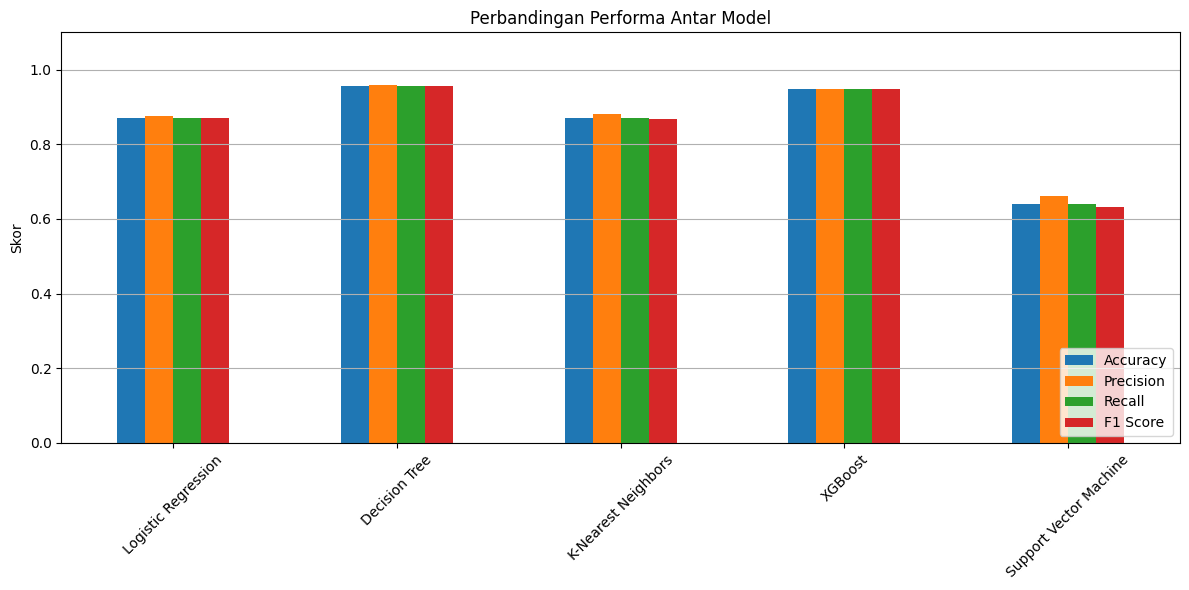

In [47]:
# Ubah dictionary ke DataFrame
df_hasil = pd.DataFrame(hasil_ringkasan).T.round(4)

# Plot
df_hasil.plot(kind='bar', figsize=(12, 6))
plt.title("Perbandingan Performa Antar Model")
plt.ylabel("Skor")
plt.xticks(rotation=45)
plt.ylim(0, 1.1)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


**Hyperparameter Tuning**

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model
rf = RandomForestClassifier(random_state=42)

# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
}

# GridSearchCV
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid,
                       scoring='f1_weighted', cv=5, n_jobs=-1)

# Fit ke data SMOTE
grid_rf.fit(X_smote, y_smote)

# Cetak parameter terbaik
print("Best Parameters:", grid_rf.best_params_)


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


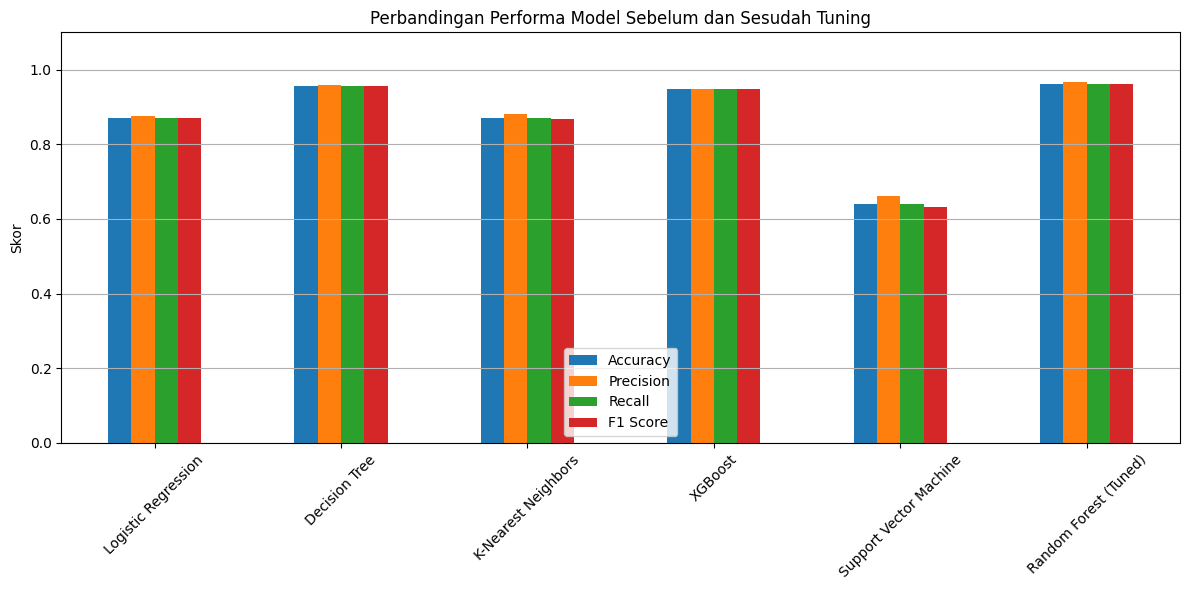

In [50]:
# Model terbaik
best_rf = grid_rf.best_estimator_

# Prediksi
y_pred_tuned = best_rf.predict(X_uji)

# Evaluasi
report_tuned = classification_report(y_uji, y_pred_tuned, output_dict=True, zero_division=0)

# Simpan hasil evaluasi tuned
hasil_ringkasan_tuned = {
    'Random Forest (Tuned)': {
        'Accuracy': report_tuned['accuracy'],
        'Precision': report_tuned['weighted avg']['precision'],
        'Recall': report_tuned['weighted avg']['recall'],
        'F1 Score': report_tuned['weighted avg']['f1-score']
    }
}# Gabungkan hasil awal + tuning
gabungan_hasil = pd.concat([
    pd.DataFrame(hasil_ringkasan).T,
    pd.DataFrame(hasil_ringkasan_tuned).T
]).round(4)

# Plot
gabungan_hasil.plot(kind='bar', figsize=(12, 6))
plt.title("Perbandingan Performa Model Sebelum dan Sesudah Tuning")
plt.ylabel("Skor")
plt.xticks(rotation=45)
plt.ylim(0, 1.1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import pandas as pd

# Dictionary model dan parameter grid-nya
param_grids = {
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [5, 10, None],
            'min_samples_split': [2, 5],
            'criterion': ['gini', 'entropy']
        }
    },
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
        'params': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5]
        }
    },
}

hasil_ringkasan_tuned = {}

# Iterasi setiap model dan parameter grid
for nama_model, mp in param_grids.items():
    print(f"\n{'='*30}\nTuning: {nama_model}")
    grid = GridSearchCV(estimator=mp['model'],
                        param_grid=mp['params'],
                        scoring='f1_weighted',
                        cv=5, n_jobs=-1)
    grid.fit(X_smote, y_smote)

    print("Best Parameters:", grid.best_params_)
    best_model = grid.best_estimator_

    # Prediksi dan evaluasi
    y_pred = best_model.predict(X_uji)
    report = classification_report(y_uji, y_pred, output_dict=True, zero_division=0)

    hasil_ringkasan_tuned[nama_model + " (Tuned)"] = {
        'Accuracy': report['accuracy'],
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1 Score': report['weighted avg']['f1-score']
    }



Tuning: Logistic Regression


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Best Parameters: {'C': 10, 'solver': 'lbfgs'}

Tuning: Decision Tree
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2}

Tuning: K-Nearest Neighbors
Best Parameters: {'n_neighbors': 3, 'weights': 'distance'}

Tuning: XGBoost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:49:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


**Simpan Model**

In [53]:
import joblib
import os

# Buat folder penyimpanan model jika belum ada
os.makedirs("saved_models", exist_ok=True)

# Simpan semua model yang sudah di-tuning
for nama_model, mp in param_grids.items():
    model_tuned = GridSearchCV(estimator=mp['model'],
                               param_grid=mp['params'],
                               scoring='f1_weighted', cv=5, n_jobs=-1)
    model_tuned.fit(X_smote, y_smote)

    best_model = model_tuned.best_estimator_

    # Simpan model dengan nama file sesuai model
    filename = f"saved_models/{nama_model.replace(' ', '_')}_tuned.pkl"
    joblib.dump(best_model, filename)

    print(f"✅ Model {nama_model} disimpan sebagai {filename}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ Model Logistic Regression disimpan sebagai saved_models/Logistic_Regression_tuned.pkl
✅ Model Decision Tree disimpan sebagai saved_models/Decision_Tree_tuned.pkl
✅ Model K-Nearest Neighbors disimpan sebagai saved_models/K-Nearest_Neighbors_tuned.pkl


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:51:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Model XGBoost disimpan sebagai saved_models/XGBoost_tuned.pkl
